In [47]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
df=pd.read_csv("insurance.csv")

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-50-2e25d4acc21f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("vlag",as_cmap=True))


<AxesSubplot:>

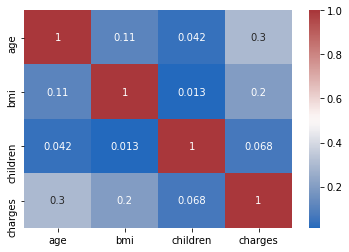

In [50]:
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("vlag",as_cmap=True))

In [51]:
df['sex']=df['sex'].replace({'male':1,'female':0})

In [52]:
df['smoker']=df['smoker'].replace({'yes':1,'no':0})

<ipython-input-53-2e25d4acc21f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("vlag",as_cmap=True))


<AxesSubplot:>

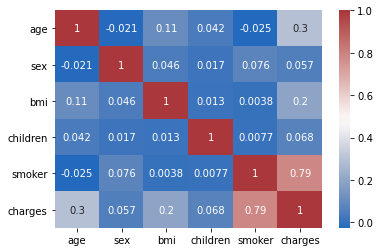

In [53]:
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("vlag",as_cmap=True))


C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

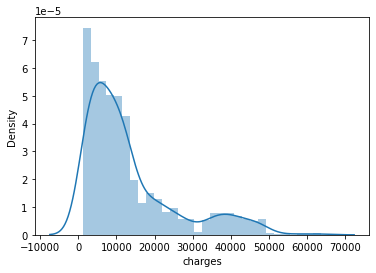

In [54]:
sns.distplot(df['charges'])

In [55]:
df['charges']=np.log(df['charges'])

C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

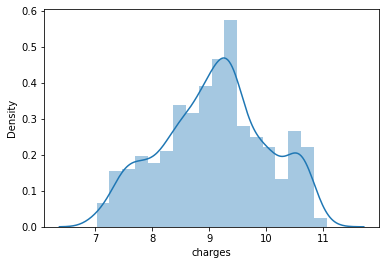

In [56]:
sns.distplot(df['charges'])

In [57]:
df.charges.skew()

-0.09009752473024582

In [58]:
sd=df.select_dtypes(exclude=['object'])

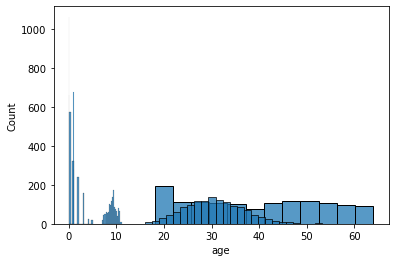

In [59]:
fig,ax
for column in sd:
    sns.histplot(sd[column])

C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

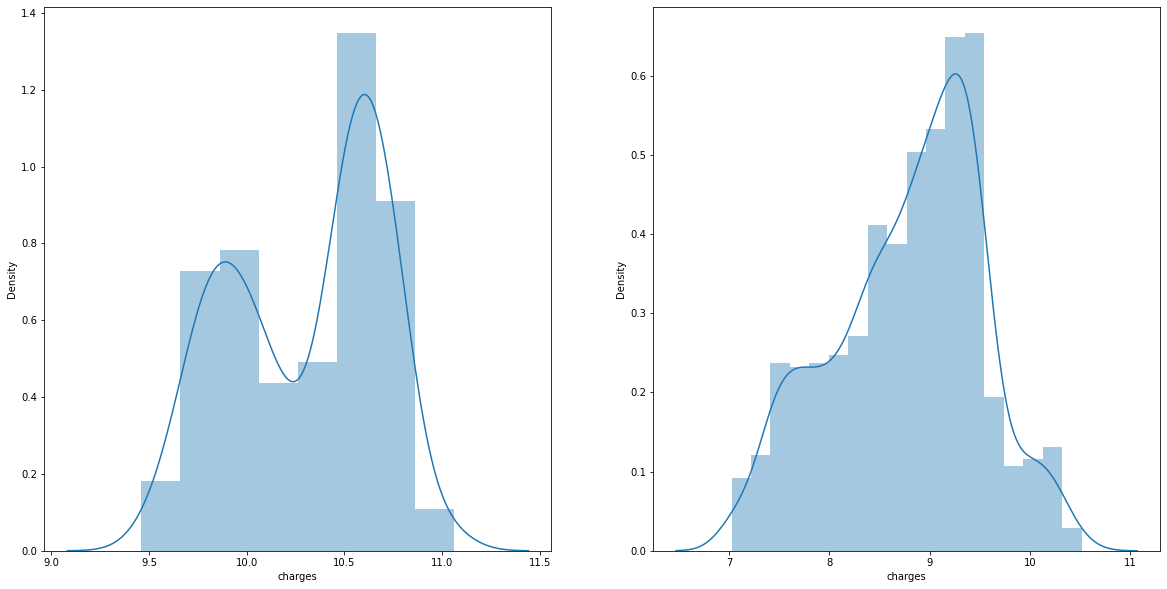

In [60]:
fig,ax=pl.subplots(1,2,figsize=(20,10))
sns.distplot(df.loc[df['smoker']==1]['charges'],ax=ax[0])
sns.distplot(df.loc[df['smoker']==0]['charges'],ax=ax[1])

C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sex', ylabel='Density'>

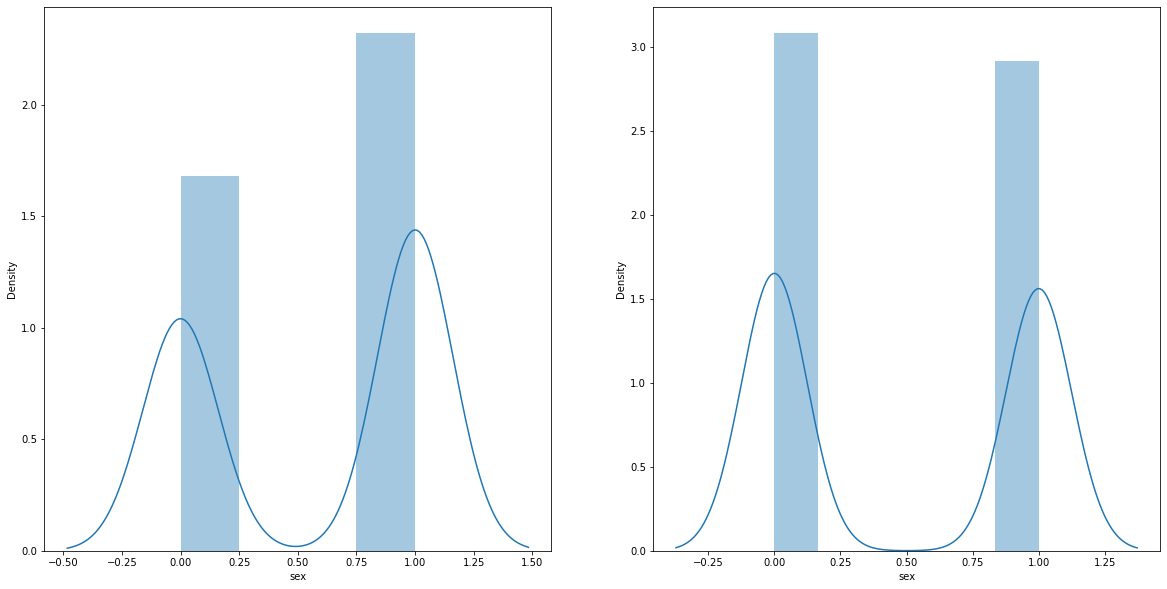

In [61]:
fig,ax=pl.subplots(1,2,figsize=(20,10))
sns.distplot(df.loc[df['smoker']==1]['sex'],ax=ax[0])
sns.distplot(df.loc[df['smoker']==0]['sex'],ax=ax[1])

C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

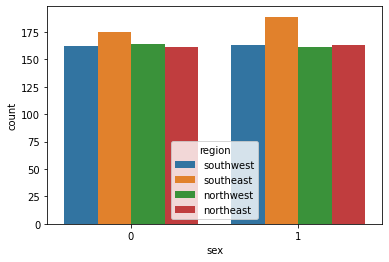

In [62]:
sns.countplot(df['sex'],hue=df['region'])

<AxesSubplot:>

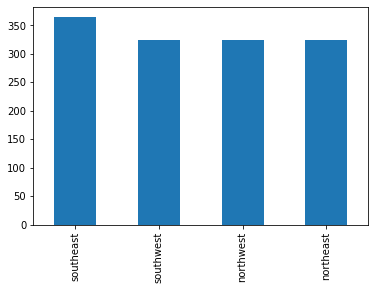

In [63]:
df['region'].value_counts().plot.bar()

<AxesSubplot:xlabel='charges', ylabel='Density'>

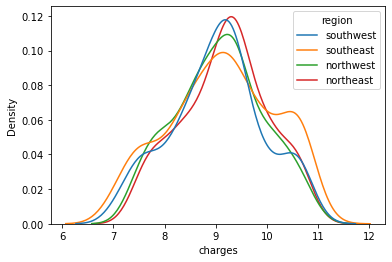

In [64]:
sns.kdeplot(df['charges'],hue=df['region'])

<AxesSubplot:xlabel='charges', ylabel='smoker'>

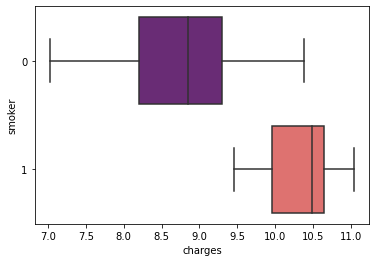

In [68]:

sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:xlabel='charges', ylabel='region'>

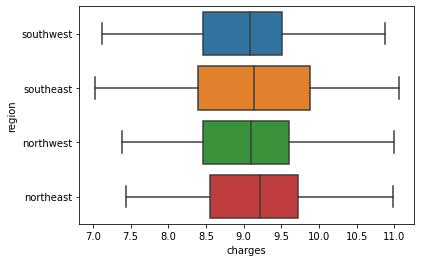

In [67]:
sns.boxplot(x='charges',y='region',data=df)

C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

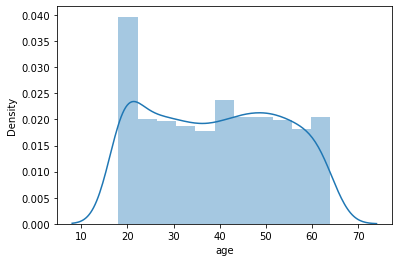

In [69]:
sns.distplot(df['age'])

In [72]:
df.age.max()

64

In [73]:
df['agegroup']=0
df.loc[(df['age']>0)&(df['age'] <= 15),"agegroup"]='children'
df.loc[(df['age']>15)&(df['age'] <= 30),"agegroup"]='young'
df.loc[(df['age']>30)&(df['age'] <= 45),"agegroup"]='adult'
df.loc[(df['age']>45)&(df['age'] <= 70),"agegroup"]='old'

In [74]:
df.head()

,age,sex,bmi,children,smoker,region,charges,agegroup
0,19,0,27.900,0,1,southwest,9.734176,young
1,18,1,33.770,1,0,southeast,7.453302,young
2,28,1,33.000,3,0,southeast,8.400538,young
3,33,1,22.705,0,0,northwest,9.998092,adult
4,32,1,28.880,0,0,northwest,8.260197,adult


C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agegroup', ylabel='count'>

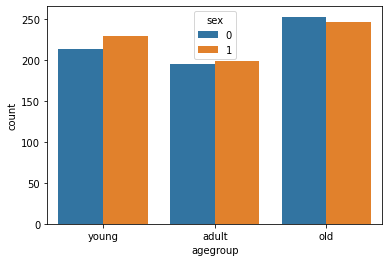

In [75]:
sns.countplot(df['agegroup'],hue=df['sex'])

In [76]:
df.age.min()

18

C:\Users\JS-MED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agegroup', ylabel='count'>

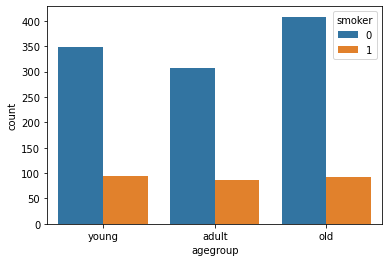

In [78]:
sns.countplot(df['agegroup'],hue=df['smoker'])

<AxesSubplot:xlabel='charges', ylabel='smoker'>

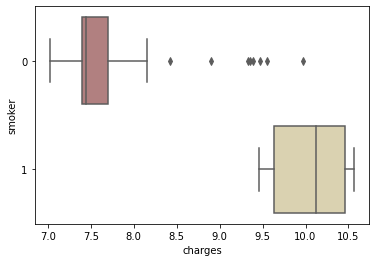

In [79]:
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

In [92]:
df=pd.read_csv("movies.csv")

In [93]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [94]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [95]:
df.MOVIES.duplicated().sum()

3182

In [ ]:
df=

In [90]:
df.MOVIES.duplicated().sum()

AttributeError: 'Series' object has no attribute 'MOVIES'